In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel("data/bike.xlsx")
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed(ms),cnt
0,1,0,1,0,6,0,2,0.355170,0.828620,0.284606,985
1,1,0,1,0,0,0,2,0.379232,0.715771,0.466215,801
2,1,0,1,0,1,1,1,0.171000,0.449638,0.465740,1349
3,1,0,1,0,2,1,1,0.175530,0.607131,0.284297,1562
4,1,0,1,0,3,1,1,0.209120,0.449313,0.339143,1600


Проверка на наличие пустых строк:

In [3]:
data.isna().sum()

season           0
yr               0
mnth             0
holiday          0
weekday          0
workingday       0
weathersit       0
temp             0
hum              0
windspeed(ms)    0
cnt              0
dtype: int64

Проверка на наличие дубликатов:

In [4]:
data[data.duplicated() == True]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed(ms),cnt


Статистика датасета:

In [5]:
data.dtypes

season             int64
yr                 int64
mnth               int64
holiday            int64
weekday            int64
workingday         int64
weathersit         int64
temp             float64
hum              float64
windspeed(ms)    float64
cnt                int64
dtype: object

In [6]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed(ms),cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.543594,0.645649,0.346536,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.228091,0.146457,0.159766,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.346343,0.534704,0.232045,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.547268,0.644388,0.326928,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.743002,0.750857,0.434622,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,1.000000,1.000000,1.000000,8714.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         731 non-null    int64  
 1   yr             731 non-null    int64  
 2   mnth           731 non-null    int64  
 3   holiday        731 non-null    int64  
 4   weekday        731 non-null    int64  
 5   workingday     731 non-null    int64  
 6   weathersit     731 non-null    int64  
 7   temp           731 non-null    float64
 8   hum            731 non-null    float64
 9   windspeed(ms)  731 non-null    float64
 10  cnt            731 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


График распределения столбцов:

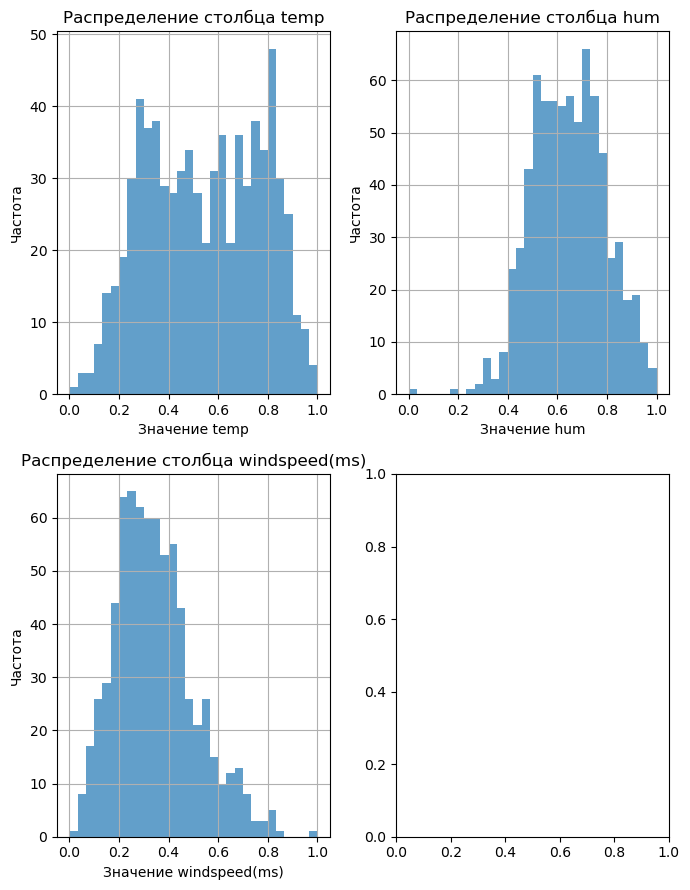

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 9))
columns = ["temp", "hum", "windspeed(ms)"]
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    axes[row, col].hist(data[column], bins=30, alpha=0.7)
    axes[row, col].set_title(f"Распределение столбца {column}")
    axes[row, col].set_xlabel(f"Значение {column}")
    axes[row, col].set_ylabel("Частота")
    axes[row, col].grid(True)

plt.tight_layout()
plt.show()

Матрица корреляции:

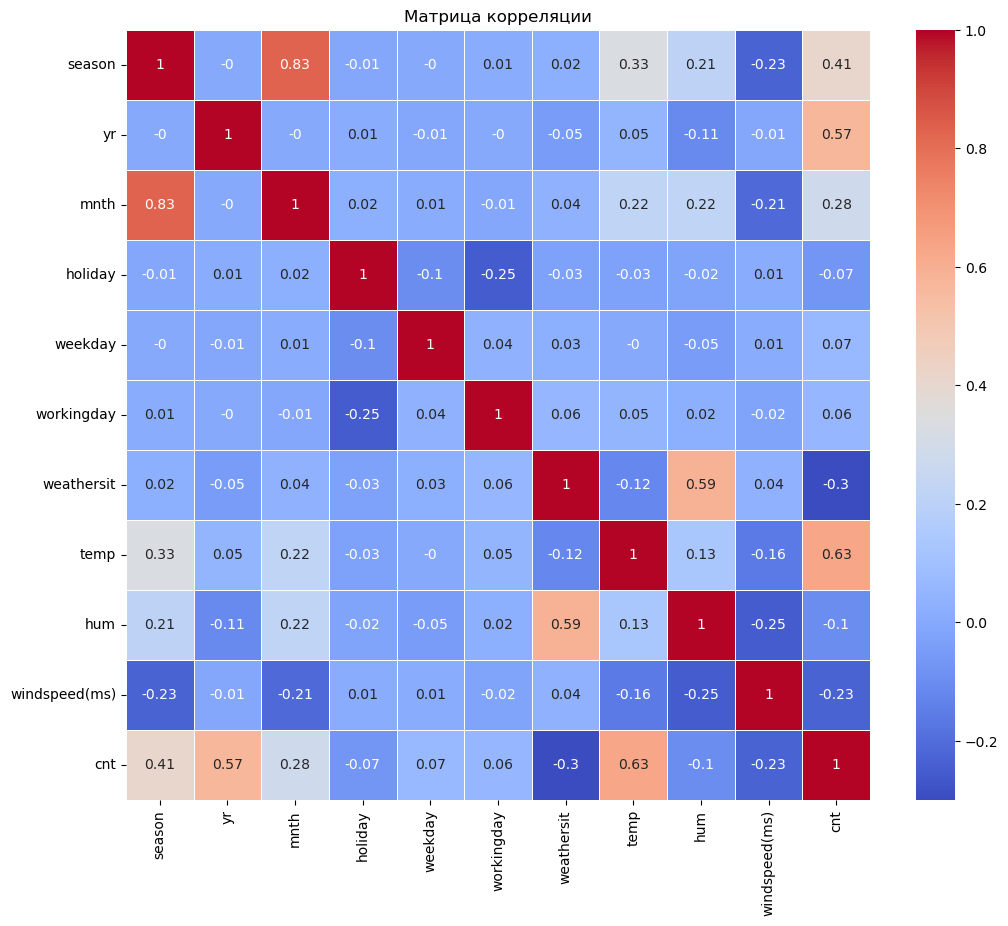

In [9]:
import seaborn as sns

plt.figure(figsize=(12, 10))
corr_matrix = data.corr()
corr_matrix = np.round(corr_matrix, 2)
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap="coolwarm")
plt.title("Матрица корреляции")
plt.show()

Высокая зависимость между переменными mnth и season...?

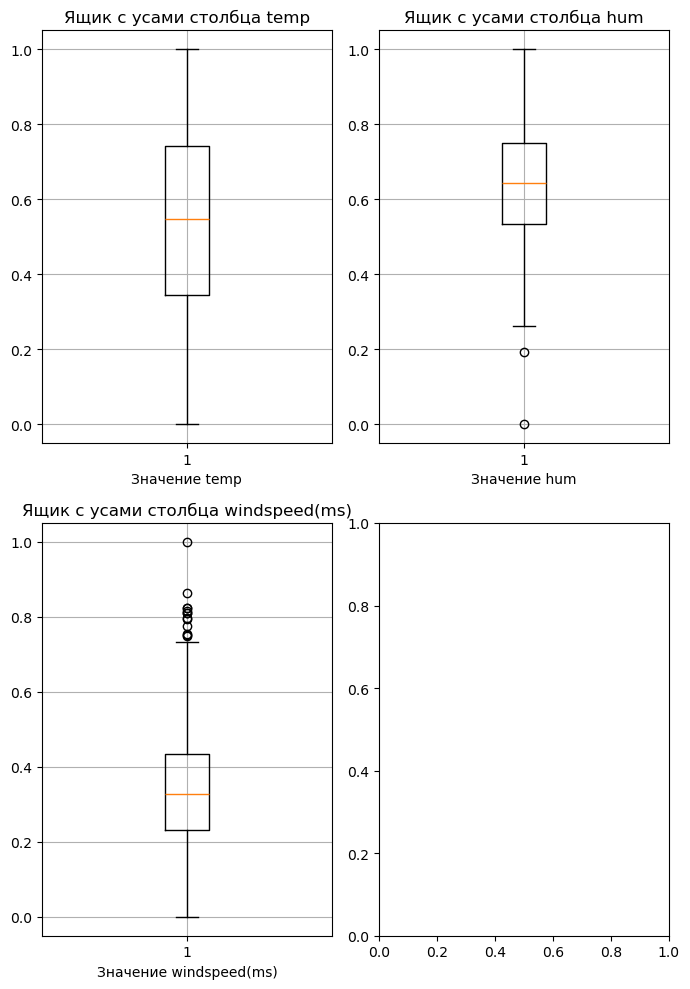

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 10))
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    axes[row, col].boxplot(data[column])
    axes[row, col].set_title(f"Ящик с усами столбца {column}")
    axes[row, col].set_xlabel(f"Значение {column}")
    axes[row, col].grid(True)

plt.tight_layout()
plt.show()

Имеются выбросы, можно сделать клиппинг?

Разделение данных на train/test:

In [4]:
y = data["cnt"]
X = data.drop("cnt", axis=1)

In [5]:
from preproccessing import data_split

X_train, y_train, X_test, y_test = data_split(X, y, size=(0.8, 0.2))

In [6]:
X_train.shape

(585, 10)

Нормализация:

In [7]:
from preproccessing import Normalizer

columns = [7, 8, 9]
normis = Normalizer("standart")
X_train_norm = normis.fit_transform(X_train, columns)
X_test_norm = normis.transform(X_test, columns)

Модели:

In [8]:
from models.linear import LassoRegression, LinearRegression, RidgeRegression

model_linear = LinearRegression()
model_linear_grad = LinearRegression(
    type="grad", learning_rate=1e-3, n_iterations=20000
)

model_ridge = RidgeRegression()
model_ridge_grad = RidgeRegression(
    type="grad", learning_rate=0.01, n_iterations=1000, alpha=0.1
)

model_lasso_grad = LassoRegression(type="grad", learning_rate=1e-3, n_iterations=20000)

In [9]:
from metrics import mae_score, mape, mse_score, r2_score, rmse_score


In [10]:
model_linear.fit(X_train_norm, y_train)
y_pred = model_linear.predict(X_test_norm)
(
    r2_score(y_pred, y_test),
    mse_score(y_pred, y_test),
    mae_score(y_pred, y_test),
    mape(y_pred, y_test),
    rmse_score(y_pred, y_test),
)

(0.7089037936338922,
 3271162.3630762273,
 665.8372478458157,
 0.1601306018062075,
 1808.6354975716438)

In [11]:
model_linear_grad.fit(X_train_norm, y_train)
y_pred = model_linear_grad.predict(X_test_norm)
(
    r2_score(y_pred, y_test),
    mse_score(y_pred, y_test),
    mae_score(y_pred, y_test),
    mape(y_pred, y_test),
    rmse_score(y_pred, y_test),
)

(0.711539011261672,
 2144240.457644738,
 653.3216164378259,
 0.15978739415225912,
 1464.3225251442177)

In [12]:
model_ridge.fit(X_train_norm, y_train)
y_pred = model_ridge.predict(X_test_norm)
(
    r2_score(y_pred, y_test),
    mse_score(y_pred, y_test),
    mae_score(y_pred, y_test),
    mape(y_pred, y_test),
    rmse_score(y_pred, y_test),
)

(0.7081473784694823,
 3245874.511069193,
 663.3256271561927,
 0.15932981640296193,
 1801.6310696336232)

In [13]:
model_ridge_grad.fit(X_train_norm, y_train)
y_pred = model_ridge_grad.predict(X_test_norm)
(
    r2_score(y_pred, y_test),
    mse_score(y_pred, y_test),
    mae_score(y_pred, y_test),
    mape(y_pred, y_test),
    rmse_score(y_pred, y_test),
)

(0.6156834837607372,
 770023.3907272359,
 655.0745699297604,
 0.1516980896987757,
 877.509766741793)

In [14]:
model_lasso_grad.fit(X_train_norm, y_train)
y_pred = model_lasso_grad.predict(X_test_norm)
(
    r2_score(y_pred, y_test),
    mse_score(y_pred, y_test),
    mae_score(y_pred, y_test),
    mape(y_pred, y_test),
    rmse_score(y_pred, y_test),
)

(0.7112781411586677,
 2145038.9611373944,
 652.8600391080619,
 0.1595446266071785,
 1464.5951526402764)

Сравнение с моделями sklearn:

In [16]:
from sklearn.linear_model import Lasso, LinearRegression, Ridge

model_sk1 = LinearRegression()
model_sk1.fit(X_train_norm, y_train)

LinearRegression()

In [17]:
y_pred = model_sk1.predict(X_test_norm)
(
    r2_score(y_pred, y_test),
    mse_score(y_pred, y_test),
    mae_score(y_pred, y_test),
    mape(y_pred, y_test),
    rmse_score(y_pred, y_test),
)

(0.7089037936338906,
 3271162.3630767884,
 665.8372478458166,
 0.16013060180620692,
 1808.6354975717989)

In [18]:
model_sk2 = Lasso()
model_sk2.fit(X_train_norm, y_train)

Lasso()

In [19]:
y_pred = model_sk2.predict(X_test_norm)
(
    r2_score(y_pred, y_test),
    mse_score(y_pred, y_test),
    mae_score(y_pred, y_test),
    mape(y_pred, y_test),
    rmse_score(y_pred, y_test),
)

(0.7085119642468514,
 3267609.921469322,
 664.2372890438043,
 0.15953630841625643,
 1807.6531529774516)

In [20]:
model_sk3 = Ridge()
model_sk3.fit(X_train_norm, y_train)

Ridge()

In [21]:
y_pred = model_sk3.predict(X_test_norm)
(
    r2_score(y_pred, y_test),
    mse_score(y_pred, y_test),
    mae_score(y_pred, y_test),
    mape(y_pred, y_test),
    rmse_score(y_pred, y_test),
)

(0.7081473784694858,
 3245874.511068147,
 663.325627156191,
 0.1593298164029633,
 1801.6310696333328)